In [4]:
%matplotlib inline

import numpy as np
import pandas as ps
import matplotlib.pyplot as plt

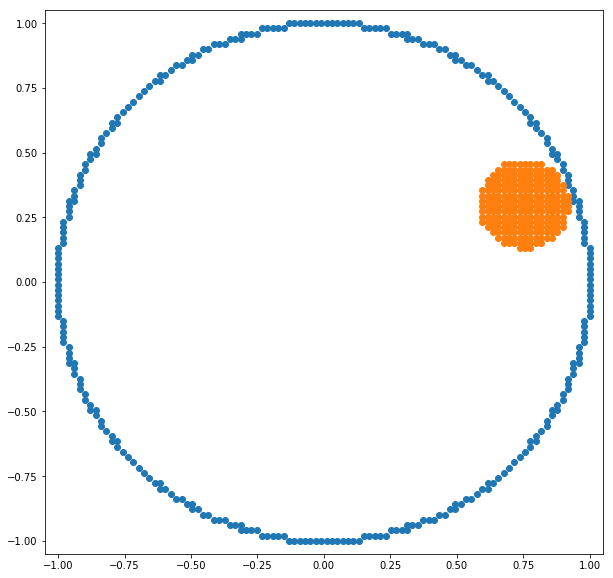

In [8]:
def norm(x,y):
    return np.sqrt(x*x+y*y)

def mobius_transformation(a):
    return lambda z: (z-a)/(1-z.conjugate()*a)

def harnack_distance(x,y,ρ=1,a1=0,a2=0):
    if norm(a1,a2)>=0.99:
        return 0
    #if norm(x,y)>=1.01:
        #return 0
    ϕ_a=mobius_transformation(a1+a2*1j)
    z=ϕ_a(x+y*1j)
    return(ρ+np.abs(z))/(ρ-np.abs(z))

X=np.linspace(-1,1,100)
Y=np.linspace(-1,1,100)

unit_circle=[]
#for a in X:
#    for b in Y:
#        c=norm(a,b)
#        if c>=0.99 and c<=1.01:
#            unit_circle.append((a,b))
unit_circle=np.array([np.tile(X, len(Y)), np.repeat(Y, len(X))]).T
unit_circle=unit_circle[(norm(*unit_circle.T)>=0.99) & (norm(*unit_circle.T)<=1.01)]

R=5
Z=[]
#for a in X:
#    for b in Y:
#        c=harnack_distance(a,b,a1=0.85)
#        if c<=R and c>=1 and norm(a,b)<=1:
#            Z.append((a,b))
Z=np.array([np.tile(X, len(Y)), np.repeat(Y, len(X))]).T
Z=Z[(harnack_distance(*Z.T,a1=0.85,a2=0.34)<R) & (harnack_distance(*Z.T,a1=0.85,a2=0.34)>=1) & (norm(*Z.T)<=1)]

plt.figure(figsize=(10,10),facecolor='w')
plt.xlim(-1.05,1.05)
plt.ylim(-1.05,1.05)
plt.plot(*zip(*unit_circle),'o');
plt.plot(*zip(*Z),'o');

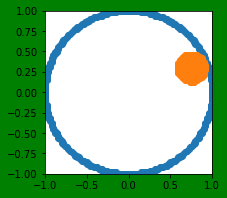

In [9]:
plt.figure(figsize=(3,3),facecolor='g')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.plot(*np.array(unit_circle).T,'o');
plt.plot(*np.array(Z).T,'o');

In [11]:
def draw_harnack_ball(aa1,aa2,RR=5):
    X=np.linspace(-1,1,100)
    Y=np.linspace(-1,1,100)

    unit_circle=[]
    #for a in X:
    #    for b in Y:
    #        c=norm(a,b)
    #        if c>=0.99 and c<=1.01:
    #            unit_circle.append((a,b))
    unit_circle=np.array([np.tile(X, len(Y)), np.repeat(Y, len(X))]).T
    unit_circle=unit_circle[(norm(*unit_circle.T)>=0.99) & (norm(*unit_circle.T)<=1.01)]

    R=RR
    Z=[]
    #for a in X:
    #    for b in Y:
    #        c=harnack_distance(a,b,a1=0.85)
    #        if c<=R and c>=1 and norm(a,b)<=1:
    #            Z.append((a,b))
    Z=np.array([np.tile(X, len(Y)), np.repeat(Y, len(X))]).T
    Z=Z[(harnack_distance(*Z.T,a1=aa1,a2=aa2)<R) & (harnack_distance(*Z.T,a1=aa1,a2=aa2)>=1) & (norm(*Z.T)<=1)]

    plt.figure(figsize=(10,10),facecolor='w')
    plt.xlim(-1.05,1.05)
    plt.ylim(-1.05,1.05)
    plt.plot(*zip(*unit_circle),'o');
    plt.plot(*zip(*Z),'o');

In [19]:
from ipywidgets import interact
interact(draw_harnack_ball,aa1=(-0.99,0.99),aa2=(-0.99,0.99),RR=(0,10));

interactive(children=(FloatSlider(value=0.0, description='aa1', max=0.99, min=-0.99), FloatSlider(value=0.0, d…